# Testing Integrator Functions Without Velocity Verlet

Unless stated otherwise, length = AU and time = yr

# Initial Setup

In [186]:
#!gcc -shared -O2 -fPIC ode.c -o libode.so

In [188]:
import ctypes
from ctypes import *
from numpy.ctypeslib import ndpointer
import numpy as np
import matplotlib.pyplot as plt
import numba
import math

In [205]:
import odesolver
importlib.reload(odesolver)
from odesolver import *
import helpers
importlib.reload(helpers)
from helpers import *
import interfunc
importlib.reload(interfunc)
from interfunc import *
import importlib

# func_2_body mercury testing

In [193]:
GM_S = 39.4229 #AU^3.yr^{-2} solar mass parameter

a_0 = 0.39
e_0 = 0.206
theta_E_0 = -3*np.pi/4
theta_0 = theta_E_0
x_0,v_x_0,y_0,v_y_0 = ellipse_to_xy(a_0, e_0, theta_0, theta_E_0)
initial_mercury = [x_0,v_x_0,y_0,v_y_0]

In [194]:
total_time = 10*orbital_period(a_0,GM_S)
step_size = orbital_period(a_0,GM_S)/400
n_steps = int(total_time/step_size)
t,sol = solve_ode(func_2_body,[0.,total_time], n_steps, initial_mercury, args=[GM_S], method="RK4")
x,v_x,y,v_y = sol.T

Text(0.5, 1.0, 'Mercury Orbiting Sun Alone (10 orbital periods)')

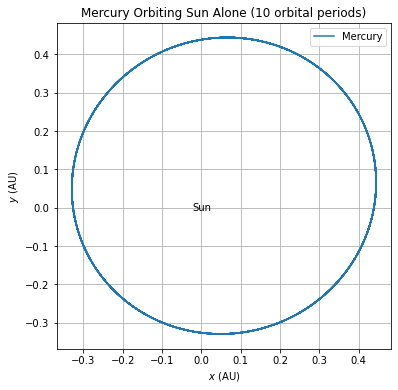

In [195]:
plt.figure(figsize=(6,6))
plt.plot(x,y,label=r"Mercury")
plt.legend()
plt.grid()
plt.xlabel(r"$x$ (AU)")
plt.ylabel(r"$y$ (AU)")
plt.text(0,0,"Sun",ha="center",va="center")
plt.title(r"Mercury Orbiting Sun Alone (10 orbital periods)")

# func_n_body solar system testing

In [196]:
GM_Sun = 39.4229 #AU^3.yr^{-2} solar mass parameter

# Earth's standard gravitational parameter
GM_Ear = 0.00011841685 #AU^3/yr^2

# https://nssdc.gsfc.nasa.gov/planetary/factsheet/planet_table_ratio.html
GM_Mer = GM_Ear*0.0553
GM_Ven = GM_Ear*0.815
GM_Mar = GM_Ear*0.107
GM_Jup = GM_Ear*317.8
GM_Sat = GM_Ear*95.2
GM_Ura = GM_Ear*14.5
GM_Nep = GM_Ear*17.1

In [197]:
# https://www.princeton.edu/~willman/planetary_systems/Sol/
init_Mer = np.array(ellipse_to_xy(0.3870993, 0.20564, 0., 0.))
init_Ven = np.array(ellipse_to_xy(0.723336, 0.00678, 0., 0.))
init_Ven[ind_v_y(0)] *= -1
init_Ear = np.array(ellipse_to_xy(1.000003, 0.01671, 0., 0.))
init_Mar = np.array(ellipse_to_xy(1.52371, 0.09339, 0., 0.))
init_Jup = np.array(ellipse_to_xy(5.2029, 0.0484, 0., 0.))
init_Sat = np.array(ellipse_to_xy(9.537, 0.0539, 0., 0.))
init_Ura = np.array(ellipse_to_xy(19.189, 0.04726, 0., 0.))
init_Nep = np.array(ellipse_to_xy(30.0699, 0.00859, 0., 0.))
np.concatenate((init_Mer,init_Ven,init_Ear,init_Mar,init_Jup,init_Sat,init_Ura,init_Nep))

array([ 3.07496200e-01,  7.61815267e-16,  0.00000000e+00,  1.24413875e+01,
        7.18431782e-01,  4.55444274e-16,  0.00000000e+00, -7.43796945e+00,
        9.83292950e-01,  9.52044104e-08,  0.00000000e+00,  6.38905980e+00,
        1.38141072e+00,  3.42284207e-16,  0.00000000e+00,  5.58992532e+00,
        4.95107964e+00,  1.77041171e-16,  0.00000000e+00,  2.89130175e+00,
        9.02295570e+00,  1.31487968e-16,  0.00000000e+00,  2.14736148e+00,
        1.82821279e+01,  2.24085559e-08,  0.00000000e+00,  1.50381272e+00,
        2.98115996e+01,  7.07661248e-17,  0.00000000e+00,  1.15569852e+00])

In [198]:
n_planets = 8
params = [GM_Sun, n_planets, GM_Mer, GM_Ven, GM_Ear, GM_Mar, GM_Jup, GM_Sat, GM_Ura, GM_Nep]
init_solar_planets = np.concatenate((init_Mer,init_Ven,init_Ear,init_Mar,init_Jup,init_Sat,init_Ura,init_Nep))

a_Nep = 30.0699
total_time = orbital_period(a_Nep,GM_S) # 1 Neptune period
step_size = orbital_period(a_0,GM_S)/100 # 1/100 of Mercury period
n_steps = int(total_time/step_size)
t,sol_untransposed = solve_ode(func_n_body,[0.,total_time], n_steps, init_solar_planets, args=params, method="RK4")
sol = sol_untransposed.T

Text(0.5, 1.0, 'All Planets (1 Neptune period)')

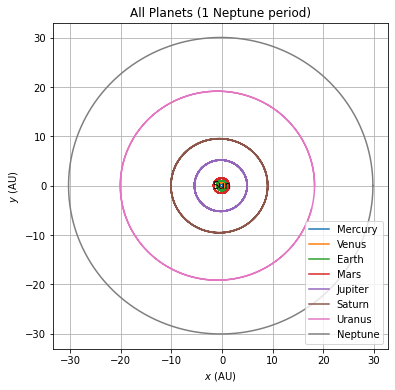

In [199]:
plt.figure(figsize=(6,6))
plt.plot(sol[ind_x(0)],sol[ind_y(0)],label=r"Mercury")
plt.plot(sol[ind_x(1)],sol[ind_y(1)],label=r"Venus")
plt.plot(sol[ind_x(2)],sol[ind_y(2)],label=r"Earth")
plt.plot(sol[ind_x(3)],sol[ind_y(3)],label=r"Mars")
plt.plot(sol[ind_x(4)],sol[ind_y(4)],label=r"Jupiter")
plt.plot(sol[ind_x(5)],sol[ind_y(5)],label=r"Saturn")
plt.plot(sol[ind_x(6)],sol[ind_y(6)],label=r"Uranus")
plt.plot(sol[ind_x(7)],sol[ind_y(7)],label=r"Neptune")
plt.legend()
plt.grid()
plt.xlabel(r"$x$ (AU)")
plt.ylabel(r"$y$ (AU)")
plt.text(0,0,"Sun",ha="center",va="center")
plt.title(r"All Planets (1 Neptune period)")

Text(0.5, 1.0, 'Inner Planets (1 Neptune period)')

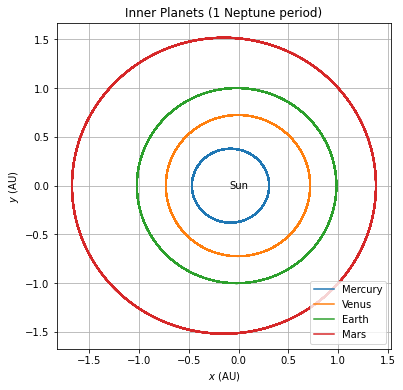

In [200]:
plt.figure(figsize=(6,6))
plt.plot(sol[ind_x(0)],sol[ind_y(0)],label=r"Mercury")
plt.plot(sol[ind_x(1)],sol[ind_y(1)],label=r"Venus")
plt.plot(sol[ind_x(2)],sol[ind_y(2)],label=r"Earth")
plt.plot(sol[ind_x(3)],sol[ind_y(3)],label=r"Mars")
plt.legend()
plt.grid()
plt.xlabel(r"$x$ (AU)")
plt.ylabel(r"$y$ (AU)")
plt.text(0,0,"Sun",ha="center",va="center")
plt.title(r"Inner Planets (1 Neptune period)")

 # other func_n_body test

[1.00000000e+00 3.84463522e-16 0.00000000e+00 6.27876580e+00
 1.25000000e+00 3.43874628e-16 0.00000000e+00 5.61589886e+00]


Text(0.5, 1.0, 'Misc Planets (1 Neptune period)')

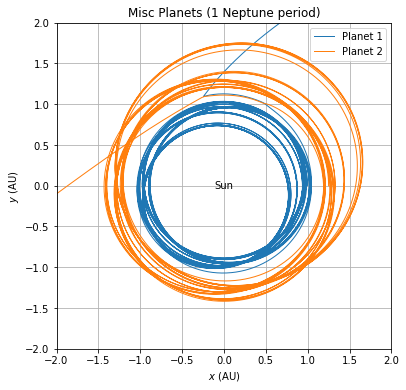

In [201]:
init_1 = np.array(old_ellipse_to_xy(1, 0., 0., 0., GM_Sun))
init_2 = np.array(old_ellipse_to_xy(1.25, 0., 0., 0., GM_Sun))

n_misc = 2
params_misc = [GM_Sun, n_misc, GM_Jup, GM_Jup]
init_misc = np.concatenate((init_1,init_2))
print(init_misc)

total_time = 0.25*orbital_period(a_Nep,GM_S) # 0.25 Neptune period
step_size = orbital_period(a_0,GM_S)/100 # 1/100 of Mercury period
n_steps = int(total_time/step_size)
t,sol_untransposed = solve_ode(func_n_body,[0.,total_time], n_steps, init_misc, args=params_misc, method="RK4")
sol = sol_untransposed.T

plt.figure(figsize=(6,6))
plt.plot(sol[ind_x(0)],sol[ind_y(0)],label=r"Planet 1",linewidth=1)
plt.plot(sol[ind_x(1)],sol[ind_y(1)],label=r"Planet 2",linewidth=1)
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.legend()
plt.grid()
plt.xlabel(r"$x$ (AU)")
plt.ylabel(r"$y$ (AU)")
plt.text(0,0,"Sun",ha="center",va="center")
plt.title(r"Misc Planets (1 Neptune period)")

Text(0.5, 1.0, 'Misc Planets (1 Neptune period)')

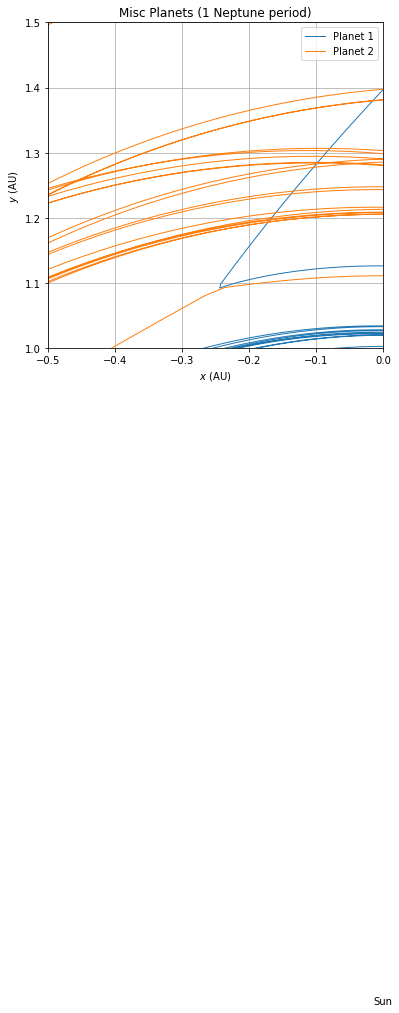

In [202]:
plt.figure(figsize=(6,6))
plt.plot(sol[ind_x(0)],sol[ind_y(0)],label=r"Planet 1",linewidth=1)
plt.plot(sol[ind_x(1)],sol[ind_y(1)],label=r"Planet 2",linewidth=1)
plt.xlim(-0.5,0)
plt.ylim(1.0,1.5)
plt.legend()
plt.grid()
plt.xlabel(r"$x$ (AU)")
plt.ylabel(r"$y$ (AU)")
plt.text(0,0,"Sun",ha="center",va="center")
plt.title(r"Misc Planets (1 Neptune period)")